# Importy

In [1]:
# podstawowe biblioteki
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# dodatkowe biblioteki
from scipy import stats
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# modele
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


# parametry bibliotek & magicmethods
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
sns.set_style("darkgrid")

In [2]:
# przy pierwszym przebiegu przeanalizowano ostrzeżenia - zostały tylko deprecation warning z bibliotek, dla lepszej estetyki zostały wyłączone
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import danych
DATA = pd.read_csv("data_clean_20190420.csv")

# Eksploracja danych

In [4]:
# weryfikacja
DATA.sample(n=10)

,area,building,building_floors,chamber,construction_year,floor,market,price,standard,url
1860,70.00,blok,7.00,4,1981.00,6.00,wtórny,279000.00,do zamieszkania,https://www.otodom.pl/oferta/przestronne-rodzi...
1620,73.05,apartamentowiec,4.00,3,nan,1.00,pierwotny,416385.00,do wykończenia,https://www.otodom.pl/oferta/silesia-widok-a1-...
1373,50.05,apartamentowiec,4.00,2,nan,0.00,pierwotny,312913.00,do wykończenia,https://www.otodom.pl/oferta/nowa-inwestycja-a...
1729,52.00,apartamentowiec,2.00,2,nan,0.00,wtórny,370000.00,NaN,https://www.otodom.pl/oferta/katowice-os-bazan...
1871,151.53,szeregowiec,1.00,4,2018.00,1.00,pierwotny,615290.00,NaN,https://www.otodom.pl/oferta/4-pokojowe-jasne-...
780,83.10,apartamentowiec,4.00,3,2019.00,4.00,pierwotny,556770.00,do wykończenia,https://www.otodom.pl/oferta/apartament-z-tara...
2033,104.00,apartamentowiec,16.00,5,nan,11.00,pierwotny,780000.00,NaN,https://www.otodom.pl/oferta/taras-133m2-na-da...
1288,50.87,apartamentowiec,4.00,3,nan,0.00,wtórny,305220.00,do wykończenia,https://www.otodom.pl/oferta/oddane-do-uzytku-...
1028,37.50,NaN,13.00,2,1966.00,6.00,wtórny,239000.00,do zamieszkania,https://www.otodom.pl/oferta/mieszkanie-ktore-...
2391,66.95,apartamentowiec,4.00,3,2018.00,2.00,pierwotny,444000.00,do wykończenia,https://www.otodom.pl/oferta/osiedle-ptasie-ka...


In [5]:
# Wstępna weryfikacja danych
print(f"Liczba rekordów: {DATA.shape[0]}, Liczba kolumn: {DATA.shape[1]} \n")
print("*"*50, "\n")
print("Braki w poszczególnych kolumnach: \n")
missings = len(DATA) - DATA.count().sort_values(ascending=True)
print(missings, "\n")
print("*"*50, "\n")
print("Braki w poszczególnych kolumnach [%]: \n")
print(missings.apply(lambda x: round(x/DATA.shape[0], 2)* 100), "\n")
print("*"*50, "\n")
print("Typy danych \n")
print(DATA.dtypes)

Liczba rekordów: 2576, Liczba kolumn: 10 

************************************************** 

Braki w poszczególnych kolumnach: 

construction_year    1426
standard              855
building              387
building_floors       243
floor                  74
area                    0
chamber                 0
market                  0
price                   0
url                     0
dtype: int64 

************************************************** 

Braki w poszczególnych kolumnach [%]: 

construction_year   55.00
standard            33.00
building            15.00
building_floors      9.00
floor                3.00
area                 0.00
chamber              0.00
market               0.00
price                0.00
url                  0.00
dtype: float64 

************************************************** 

Typy danych 

area                 float64
building              object
building_floors      float64
chamber                int64
construction_year    float64
floor      

In [6]:
# Przegląd rozkładu zmiennych ilościowych
DATA.describe()

,area,building_floors,chamber,construction_year,floor,price
count,2576.00,2333.00,2576.00,1150.00,2502.00,2576.00
mean,62.47,6.08,2.80,2001.56,2.83,365962.60
std,38.28,3.51,1.22,32.10,2.77,237454.79
min,0.00,1.00,1.00,1880.00,0.00,60000.00
25%,42.27,4.00,2.00,1993.00,1.00,258500.00
50%,51.99,5.00,3.00,2019.00,2.00,306201.25
75%,70.75,8.00,3.00,2019.00,4.00,409176.00
max,834.08,25.00,10.00,2021.00,11.00,5665000.00


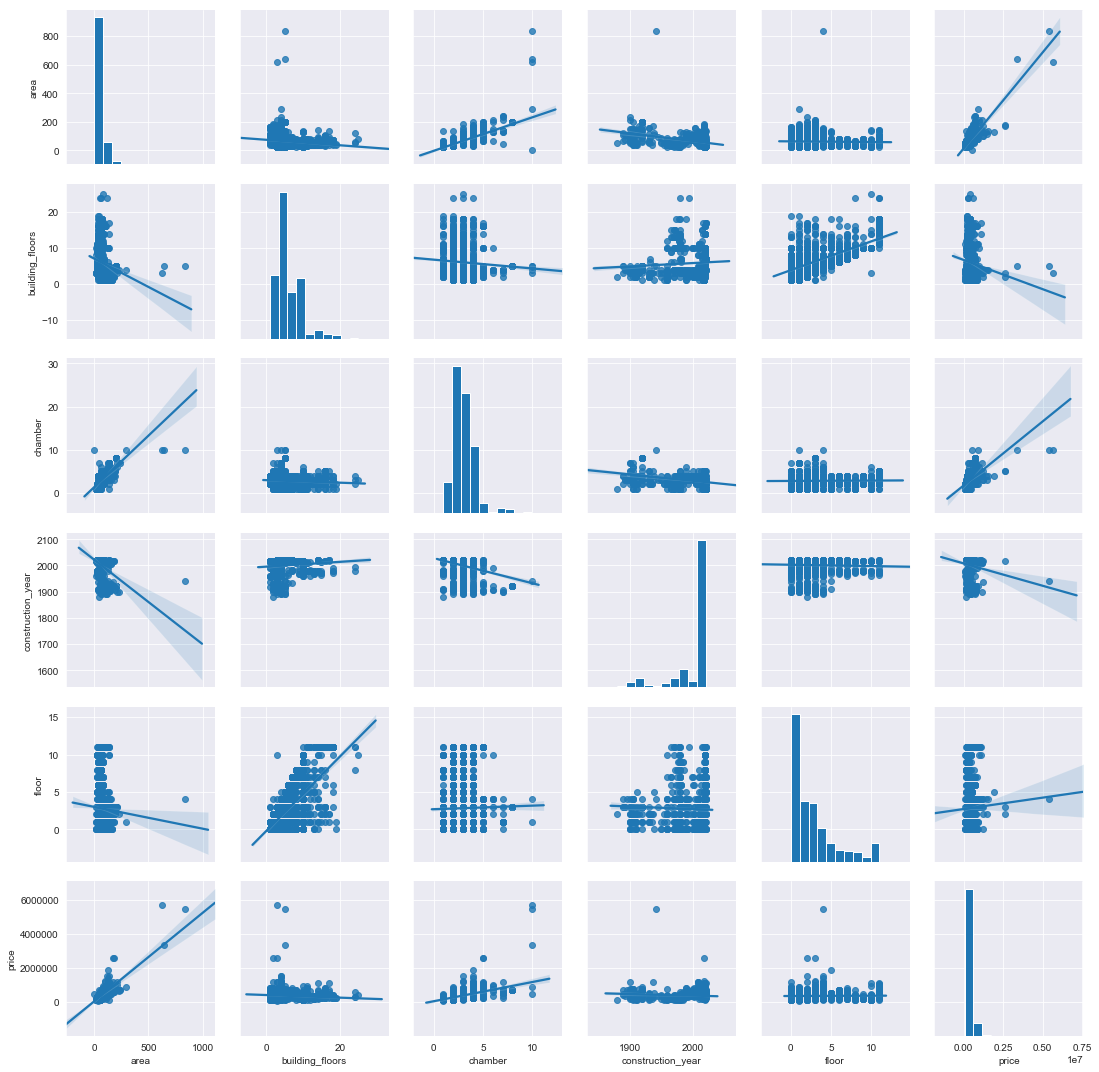

In [7]:
# Przegląd zależności pomiędzy danymi
sns.pairplot(DATA, kind="reg")

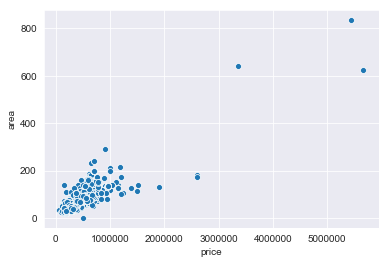

In [8]:
# Zależność pomiędzy ceną i powierzchnią
sns.scatterplot(DATA["price"], DATA["area"])

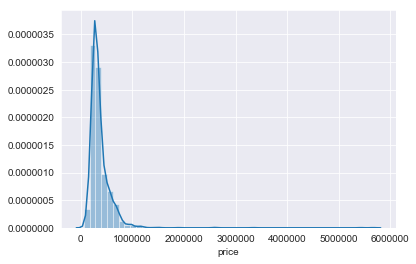

In [9]:
# histogram ceny
sns.distplot(DATA["price"])

[(0, 1000000)]

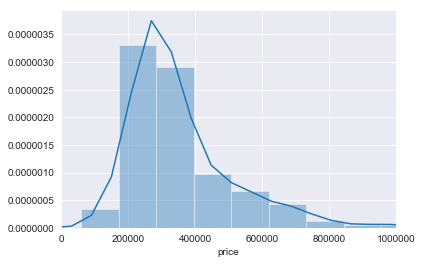

In [10]:
# histogram ceny bez wartości odstających
sns.distplot(DATA["price"]).set(xlim=(0, 1000000))

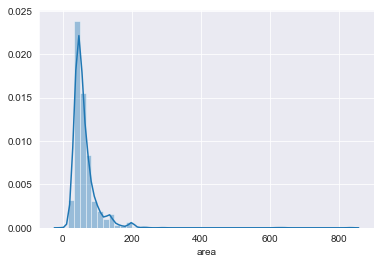

In [11]:
# histogram powierzchni
sns.distplot(DATA["area"])

[(0, 150)]

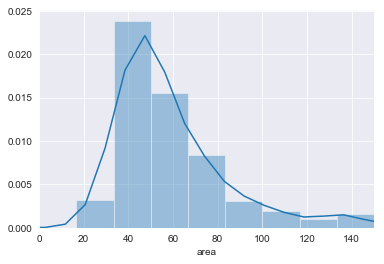

In [12]:
# histogram ceny bez wartości odstających
sns.distplot(DATA["area"]).set(xlim=(0, 150))

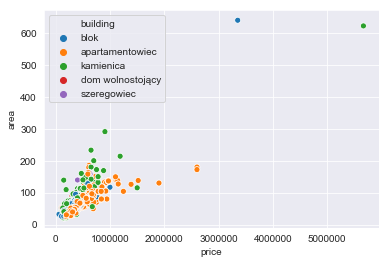

In [13]:
# Zależność pomiędzy ceną i powierzchnią vs rodzaj budynku
sns.scatterplot(DATA["price"], DATA["area"], hue=DATA["building"])

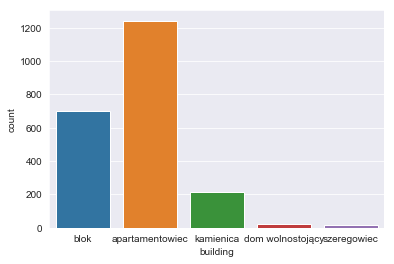

In [14]:
# Liczności w kategoriach
sns.countplot(x='building',data=DATA)

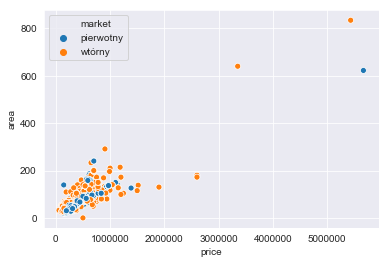

In [15]:
# Zależność pomiędzy ceną i powierzchnią vs rynek pierwotny/wtórny
sns.scatterplot(DATA["price"], DATA["area"], hue=DATA["market"])

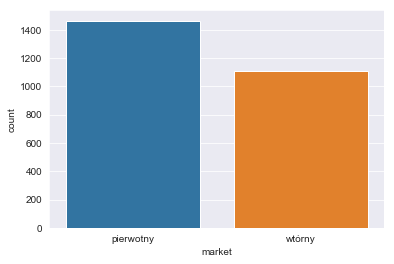

In [16]:
# Liczności w kategoriach
sns.countplot(x='market',data=DATA)

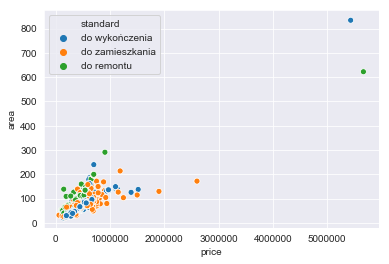

In [17]:
# Zależność pomiędzy ceną i powierzchnią vs standard
sns.scatterplot(DATA["price"], DATA["area"], hue=DATA["standard"])

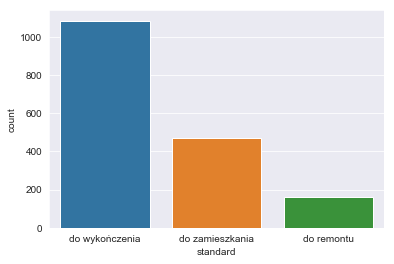

In [18]:
# Liczności w kategoriach
sns.countplot(x='standard',data=DATA)

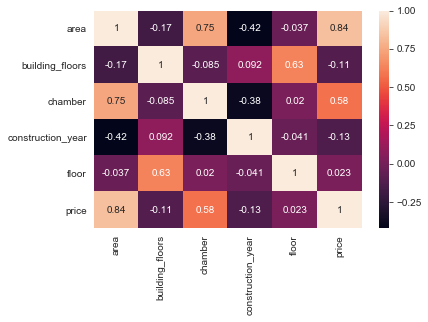

In [19]:
sns.heatmap(DATA.corr(), annot=True)

### Wnioski

* Kolumna ```construction_year``` wbrew oczekiwaniom nie niesie zbyt dużo informacji i z racji faktu, iż brakuje informacji o ponad połowie rekordów można ją usunąć.

* W analizowanej próbie znajduje się sporo wartości odstających, które mogą negatywnie wpłynąć na jakość predykcji, dlatego przy processingu należy usunąć wartości istotnie odstające.

* Wśród lokali mieszkalnych znajdują się lokale w domach wolnostojących i w zabudowie szeregowej, które prawnie się kwalifikują jako lokal mieszkalny, ale funkcjonalnie stanowią inny typ nieruchomości i również należy tego typu nieruchomości odrzucić.

* Jak wskazuje logika największy wpływ na cenę nieruchomości ma jej metraż przedstawiony w kolumnie ```area```. Dlatego braki w pozostałych cechach ilościowych można bezpiecznie wypełnić medianami lub średnimi. 

* Otodom jako źródło informacji do budowy modelu do predykcji wartości jest o tyle ułomny, że nie posiada danych lokalizacji analizowanych nieruchomości przez co odpadają wszelkie możliwości zastosowania zmiennych wykorzystujących geolokalizację.

* Zmienne jakościowe nie mają bardzo istotnego wpływu na cenę i raczej służą do różnicowaniu zbioru, dlatego bez przeszkód można wypełnić braki najczęściej występującymi wartościami.

# Przygotowanie danych

In [20]:
# przygotowanie dedykowanego DataFrame
df = DATA.drop_duplicates(subset=None, keep='first', inplace=False).copy()

In [21]:
# usunięcie zbędnych kolumn
df = df.drop(["url", "construction_year"], axis=1)

In [22]:
# usunięcie domów i szeregówek
df = df.loc[~df['building'].isin(["dom wolnostojący", "szeregowiec"])]

In [23]:
# usunięcie błędnej danej
df = df.loc[df["area"]>0]

In [24]:
# usunięcie outliersów z ceny
df = df[(np.abs(stats.zscore(df["price"])) < 3)]

In [25]:
# usunięcie outliersów z powierzchni
df = df[(np.abs(stats.zscore(df["area"])) < 3)]

In [26]:
# wypełnienie NaN najczęstszymi wartościami w zmiennych jakościowych i medianą w zmiennych ilościowych

for col in df.columns:
    if df[col].dtype=="object":
        df[col] = df[col].fillna(df[col].value_counts().index[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Dodatkowe cechy

Z uwagi na fakt, że w danych z otodom nie ma danych dotyczących lokalizacji a sama baza dotyczy tylko i wyłącznie lokali mieszkalnych to w ramach dodatkowych cech można dodać jedynie agregaty. 

W celu dodania zagregowanych danych wykorzystano zewnętrzne raporty sporządzone przez portal ```bankier.pl```

* [średnia cena ofertowa metra kwadratowego](https://www.bankier.pl/wiadomosc/Wzrost-cen-mieszkan-wyhamowal-ale-spadku-cen-nie-widac-7653826.html) dostęp: 2019-05-02

* [średnia cena wynajmu](https://www.bankier.pl/wiadomosc/Ceny-ofertowe-wynajmu-mieszkan-kwiecien-2019-Raport-Bankier-pl-7656787.html) dostęp: 2019-05-02

In [27]:
def avg_1m_price(df):
    
    """
    hardcoded data from https://www.bankier.pl/wiadomosc/Wzrost-cen-mieszkan-wyhamowal-ale-spadku-cen-nie-widac-7653826.html
    """
    
    if (df["area"] <= 38):
        if(df["market"] == "pierwotny"):
            return 7673
        else:
            return 5592
        
    if (df["area"] <= 60):
        if(df["market"] == "pierwotny"):
            return 6220
        else:
            return 5317
        
    if (df["area"] > 60):
        if(df["market"] == "pierwotny"):
            return 6158
        else:
            return 5433

In [28]:
df['avg_1m_price'] = df.apply(avg_1m_price, axis = 1)

In [29]:
def rent_price(df):
    
    """
    hardcoded data from https://www.bankier.pl/wiadomosc/Ceny-ofertowe-wynajmu-mieszkan-kwiecien-2019-Raport-Bankier-pl-7656787.html
    """
    
    if (df["area"] <= 38):
        return 1318
    if (df["area"] <= 60):
        return 1897
    if (df["area"] > 60):
        return 2483

In [30]:
df['avg_rent_price'] = df.apply(rent_price, axis = 1)

# Powtórna eksploracja danych

In [31]:
# Przegląd rozkładu zmiennych ilościowych
df.describe()

,area,building_floors,chamber,floor,price,avg_1m_price,avg_rent_price
count,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00
mean,58.10,6.07,2.70,2.83,345576.89,6005.53,2007.91
std,23.61,3.37,1.04,2.77,144108.74,666.60,388.37
min,20.72,1.00,1.00,0.00,60000.00,5317.00,1318.00
25%,41.90,4.00,2.00,1.00,256448.00,5433.00,1897.00
50%,51.40,5.00,3.00,2.00,300224.00,6158.00,1897.00
75%,69.49,8.00,3.00,4.00,394200.00,6220.00,2483.00
max,150.00,25.00,7.00,11.00,1040000.00,7673.00,2483.00


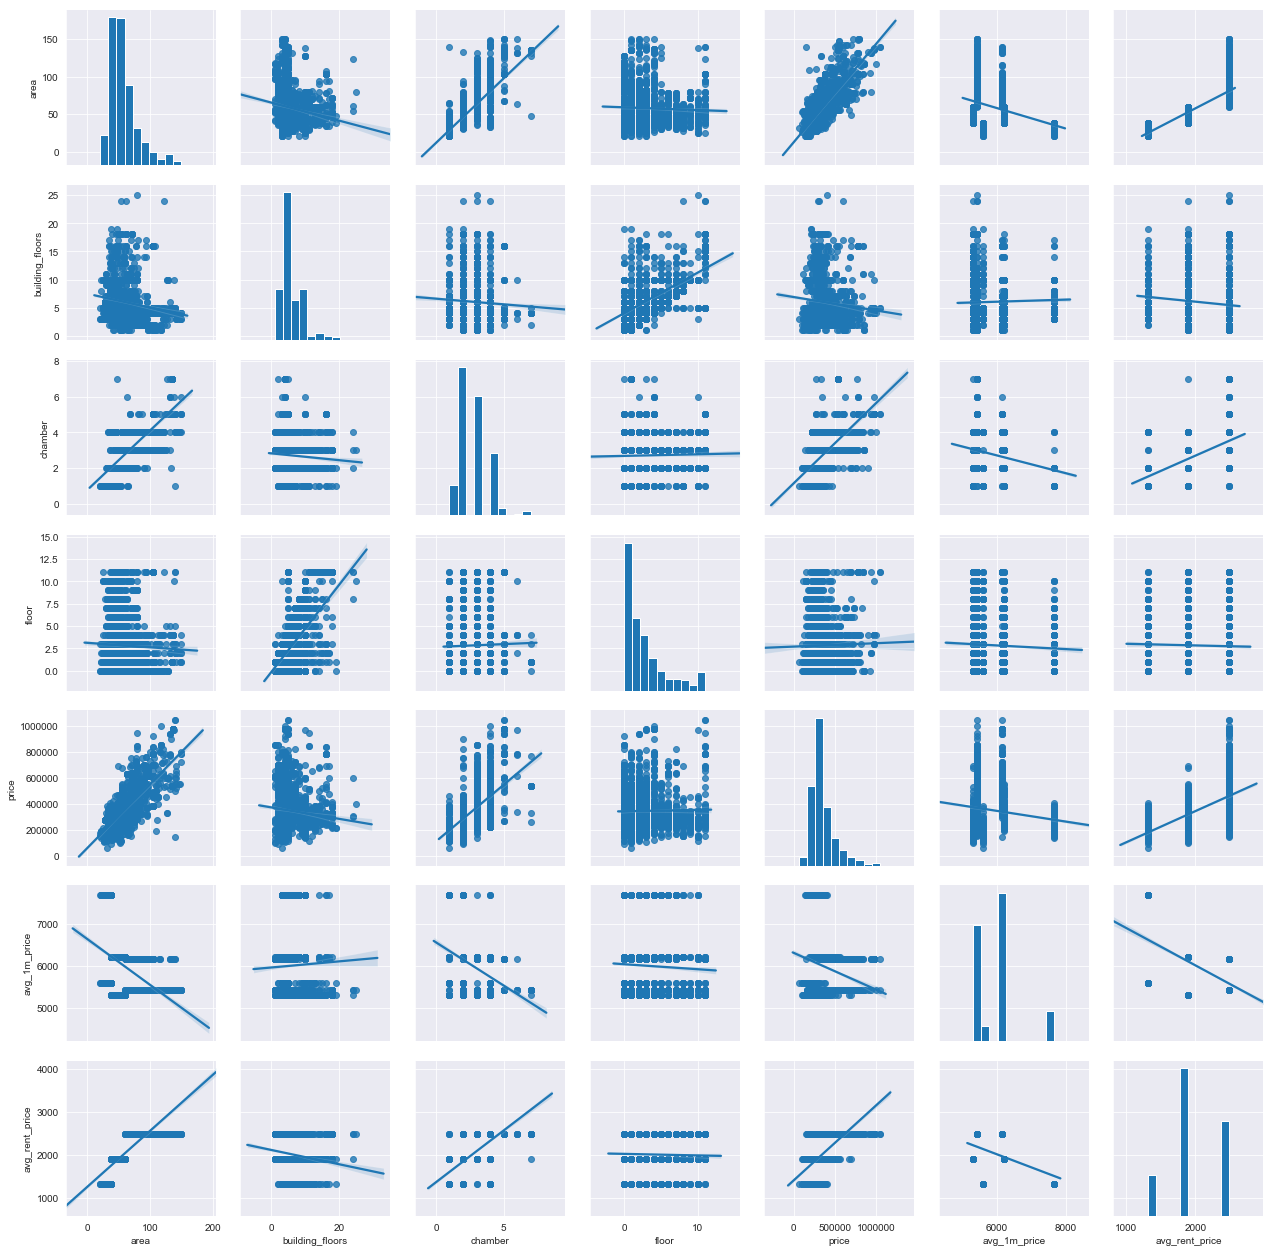

In [32]:
# Przegląd zależności pomiędzy danymi
sns.pairplot(df, kind="reg")

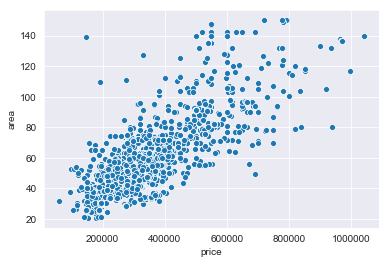

In [33]:
# Zależność pomiędzy ceną i powierzchnią
sns.scatterplot(df["price"], df["area"])

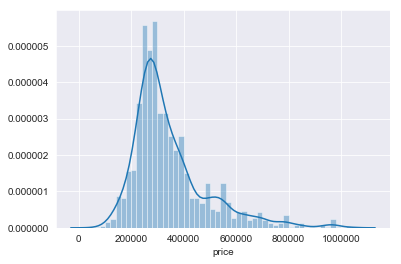

In [34]:
# histogram ceny
sns.distplot(df["price"])

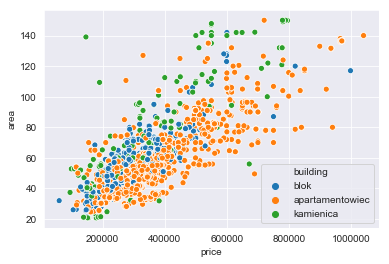

In [35]:
# Zależność pomiędzy ceną i powierzchnią vs rodzaj budynku
sns.scatterplot(df["price"], df["area"], hue=df["building"])

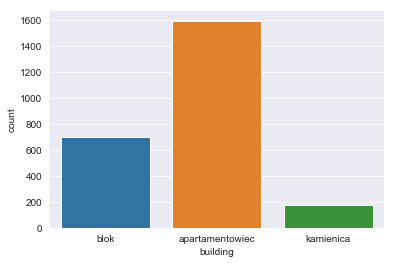

In [36]:
# Liczności w kategoriach
sns.countplot(x='building',data=df)

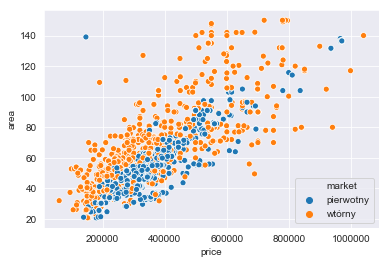

In [37]:
# Zależność pomiędzy ceną i powierzchnią vs rynek pierwotny/wtórny
sns.scatterplot(df["price"], df["area"], hue=df["market"])

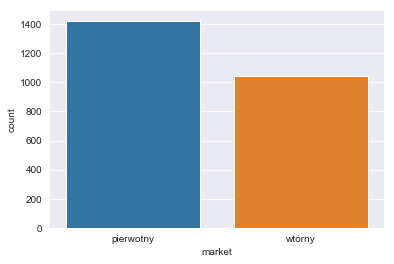

In [38]:
# Liczności w kategoriach
sns.countplot(x='market',data=df)

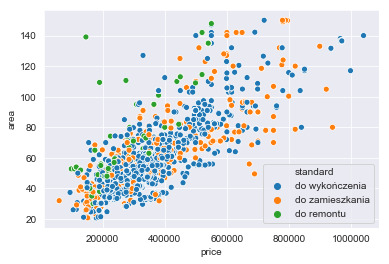

In [39]:
# Zależność pomiędzy ceną i powierzchnią vs standard
sns.scatterplot(df["price"], df["area"], hue=df["standard"])

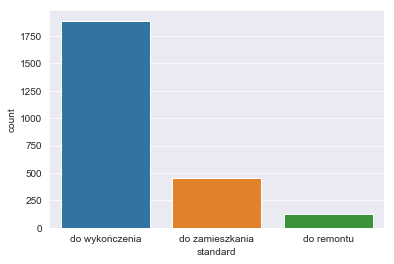

In [40]:
# Liczności w kategoriach
sns.countplot(x='standard',data=df)

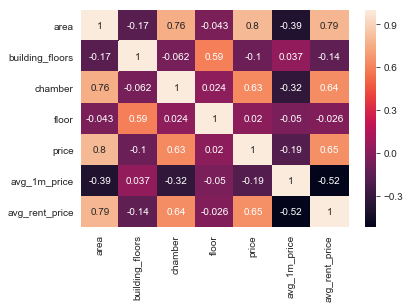

In [41]:
# heatmapa korelacji liniowej pomiędzy zmiennymi
sns.heatmap(df.corr(), annot=True)

# Label encoding

In [42]:
# Label encoding zmiennych jakościowych
le_building = LabelEncoder()
le_market = LabelEncoder()
le_standard = LabelEncoder()

df["building"] = le_building.fit_transform(df["building"])
df["market"] = le_market.fit_transform(df["market"])
df["standard"] = le_standard.fit_transform(df["standard"])

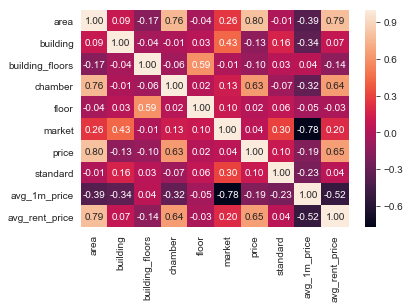

In [43]:
# heatmapa korelacji liniowej pomiędzy zmiennymi po encodingu
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Modelowanie

In [44]:
# train test split
X = df.copy().drop(["price"], axis=1)
y = df["price"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
kfold = KFold(n_splits=5, random_state=42)

### Elastic Net

In [46]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6],
                    'elasticnet__alpha': [0.3, 0.4, 1]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'elasticnet__alpha': 0.3, 'polynomialfeatures__degree': 5}

### Lasso

In [47]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'lasso__alpha': 3, 'polynomialfeatures__degree': 4}

### Ridge

In [48]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1}

### LinearRegression

In [49]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'polynomialfeatures__degree': 2}

### SVR

In [50]:
grid_5 = GridSearchCV(SVR(kernel='rbf'),
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                               "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'C': 10000, 'gamma': 0.001}

### RandomForrest

In [51]:
grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features= 'sqrt', n_estimators=50, oob_score = True),
                   param_grid={
                   'n_estimators': [100, 150, 300],
                    'max_features': ['auto', 'sqrt', 'log2'],
                   },
                    cv=kfold,
                    refit=True)
grid_6.fit(X_train, y_train)
grid_6.best_params_

{'max_features': 'sqrt', 'n_estimators': 300}

### XGB Regression

In [52]:
grid_7 = GridSearchCV(XGBRegressor(nthreads=-1, n_estimators=50),
                     param_grid={
                         'n_estimators': [100, 150, 300],
                     },
                     cv=kfold,
                     refit=True)
grid_7.fit(X_train, y_train)
grid_7.best_params_

{'n_estimators': 150}

# Porównanie skuteczności modeli

### Porównanie ogólne

In [53]:
models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RFR', grid_6.best_estimator_))
models.append(('XGBR', grid_7.best_estimator_))

In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**************************************************
ElasticNet 

R^2: 0.77
Median absolute error: 29638.976
Mean absolute error: 47182.862
Mean absolute percentage error: 14.944


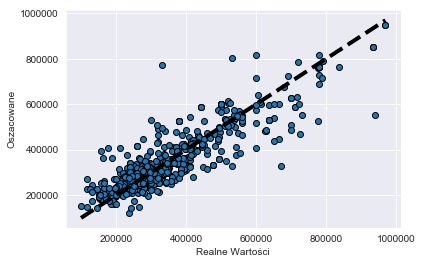

**************************************************
Lasso 

R^2: 0.766
Median absolute error: 33097.691
Mean absolute error: 48103.741
Mean absolute percentage error: 15.265


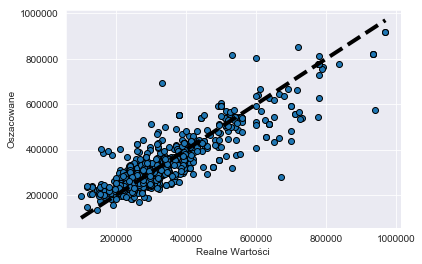

**************************************************
Ridge 

R^2: 0.764
Median absolute error: 32704.904
Mean absolute error: 48345.89
Mean absolute percentage error: 15.283


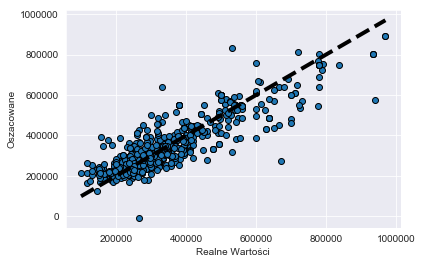

**************************************************
LR 

R^2: 0.764
Median absolute error: 33023.621
Mean absolute error: 48300.328
Mean absolute percentage error: 15.282


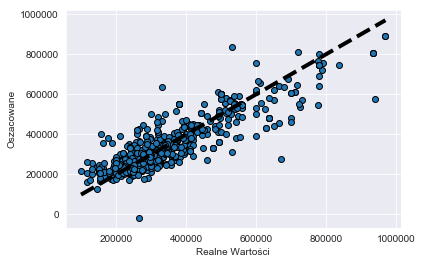

**************************************************
SVR 

R^2: 0.615
Median absolute error: 32208.617
Mean absolute error: 56636.309
Mean absolute percentage error: 16.393


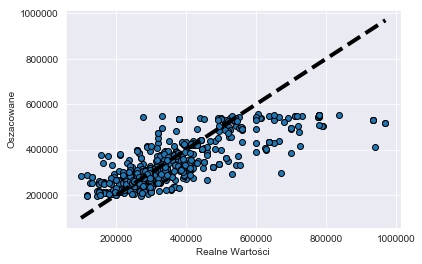

**************************************************
RFR 

R^2: 0.857
Median absolute error: 10769.311
Mean absolute error: 28480.603
Mean absolute percentage error: 9.057


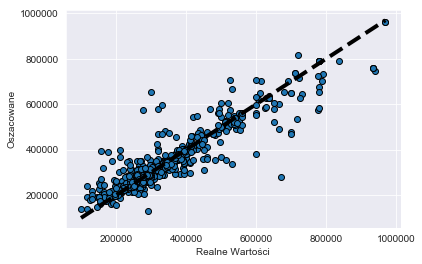

**************************************************
XGBR 

R^2: 0.841
Median absolute error: 21553.781
Mean absolute error: 36258.211
Mean absolute percentage error: 11.395


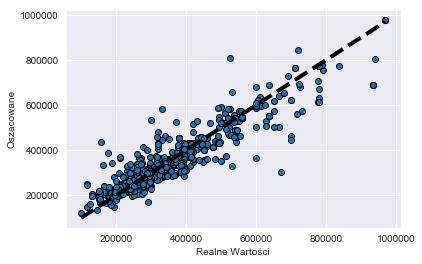

In [55]:
for name, model in models:
    print("*"*50)
    print(name, "\n")
    print(f"R^2: {round(metrics.r2_score(y_test, model.predict(X_test)), 3)}")
    print(f"Median absolute error: {round(metrics.median_absolute_error(y_test, model.predict(X_test)), 3)}")
    print(f"Mean absolute error: {round(metrics.mean_absolute_error(y_test, model.predict(X_test)), 3)}")
    print(f"Mean absolute percentage error: {round(mean_absolute_percentage_error(y_test, model.predict(X_test)), 3)}")
    
    results = pd.DataFrame()
    results['actual'] = y_test
    results['predicted'] = model.predict(X_test)
    fig, ax = plt.subplots()
    ax.scatter(results['actual'], results['predicted'], edgecolors=(0, 0, 0))
    ax.plot([results['actual'].min(), results['actual'].max()], [results['actual'].min(), results['actual'].max()], 'k--', lw=4)
    ax.set_xlabel('Realne Wartości')
    ax.set_ylabel('Oszacowane')
    plt.show()

## Cross-val score

### R^2

In [56]:
r2_cv_results = pd.DataFrame()

for name, model in models:
    r2_cv_results[name] = cross_val_score(model, X_test, y_test, cv=kfold,scoring="r2")

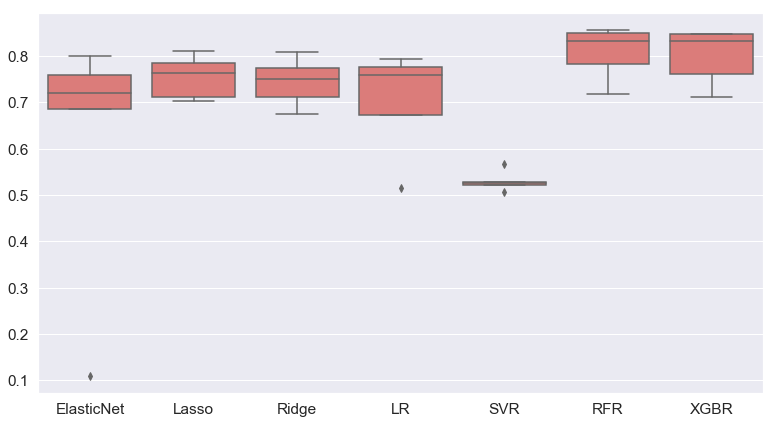

In [57]:
# Wykres pudełkowy
plt.figure(figsize=(13,7))
sns.set(font_scale=1.4)
sns.boxplot(data=r2_cv_results, color = '#eb6c6a')
plt.show()

### MAE

In [58]:
mae_cv_results = pd.DataFrame()

for name, model in models:
    mae_cv_results[name] = cross_val_score(model, X_test, y_test, cv=kfold,scoring="neg_mean_absolute_error")

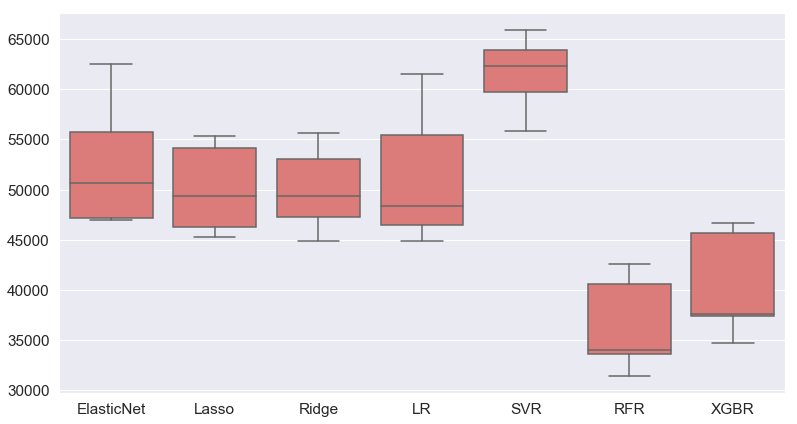

In [59]:
# Wykres pudełkowy
plt.figure(figsize=(13,7))
sns.set(font_scale=1.4)
sns.boxplot(data=-mae_cv_results, color = '#eb6c6a')
plt.show()

# Podsumowanie przeprowadzonej analizy

Ze wszystkich wykorzystanych modeli najlepsze wyniki uzyskał algorytm ```Random Forrest Regression```. Nawet przy zastosowaniu krzyżowej walidacji jego wyniki są najstabilniejsze. Pomimo dużego rozstrzału cen na analizowanym rynku najlepiej zachował zdolność do generalizowania i to zdecydowało o najlepszych wynikach. 

Model mylił się średnio o ```+/- ~9%``` co jest bardzo dobrym wynikiem. Przyjmuje się, że dobry rzeczoznawca myli się średnio o +/- 10%. Warto również przeanalizować zmienne, które najwięcej wniosły do modelu, zostały one przedstawione na poniższym wykresie:

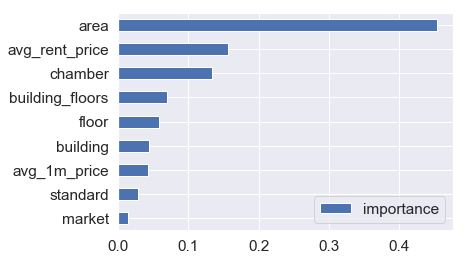

In [60]:
feature_importances = pd.DataFrame(grid_6.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)
feature_importances.plot(kind='barh')
plt.show()

Nie dziwi fakt, że powierzchnia, oraz zmienne z nią skorelowane wniosły najwięcej. Jest to jak najbardziej prawidłowe zjawisko, gdyż naturalnie większe mieszkania są droższe. Co ciekawe na analizowanych danych standard wykończenia miał niższą wagę niż piętro na którym mieścił się lokal. 

### Wnioski z projektu

Przeprowadzony eksperyment pokazuje, że możliwe jest pobranie danych z popularnego serwisu z ogłoszeniami a następnie zbudowanie na bazie pobranych danych modelu, który cechuje się dobrymi predykcjami. Analiza została przeprowadzona na rynku mieszkań w Katowicach ale z powodzeniem przy większych zasobach można by ją rozszerzyć na całą Polskę. 

Stworzone rozwiązanie mogłoby zostać wykorzystane do budowy rozwiązania, które mogło by wesprzeć klienta przy tworzeniu oferty sprzedaży mieszkania, gdyż rynek nieruchomości cechuje się niedoskonałością informacji. 

Projekt możnaby w przyszłości rozszerzyć o text-mining opisów oraz analizę obrazu ze zdjęć z oferty oraz przy rozszerzeniu do całej Polski możnaby wykorzystać dane geolokalizacyjne. Zbudować model a następnie osadzić go na prostym formularzu i mógłby szybko przynieść wartość biznesową.